In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/text-from-images/image_files/testimage2.jpeg
/kaggle/input/text-from-images/image_files/testimage5.jpeg
/kaggle/input/text-from-images/image_files/testimage4.jpeg
/kaggle/input/text-from-images/image_files/testimage3.jpeg
/kaggle/input/text-from-images/image_files/testimage1.jpeg
/kaggle/input/text-from-images/json_files/testimage5.json
/kaggle/input/text-from-images/json_files/testimage1.json
/kaggle/input/text-from-images/json_files/testimage2.json
/kaggle/input/text-from-images/json_files/testimage3.json
/kaggle/input/text-from-images/json_files/testimage4.json


# Outline
1. Take a look at the data
2. Extract text from images:
    - pytesseract
    - easyocr
    - keras_ocr
3. Run on a few examples and compare the results

In [3]:
from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

In [4]:
img_fns = glob('../input/text-from-images/image_files/*')

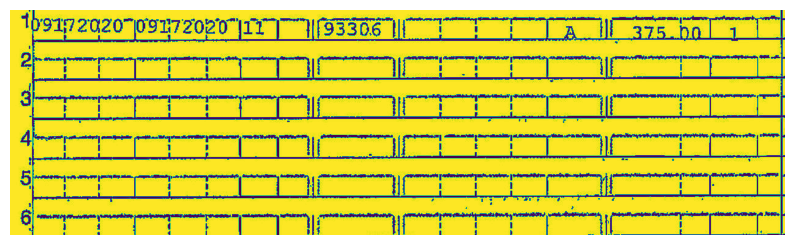

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(img_fns[0]))
ax.axis('off')
plt.show()

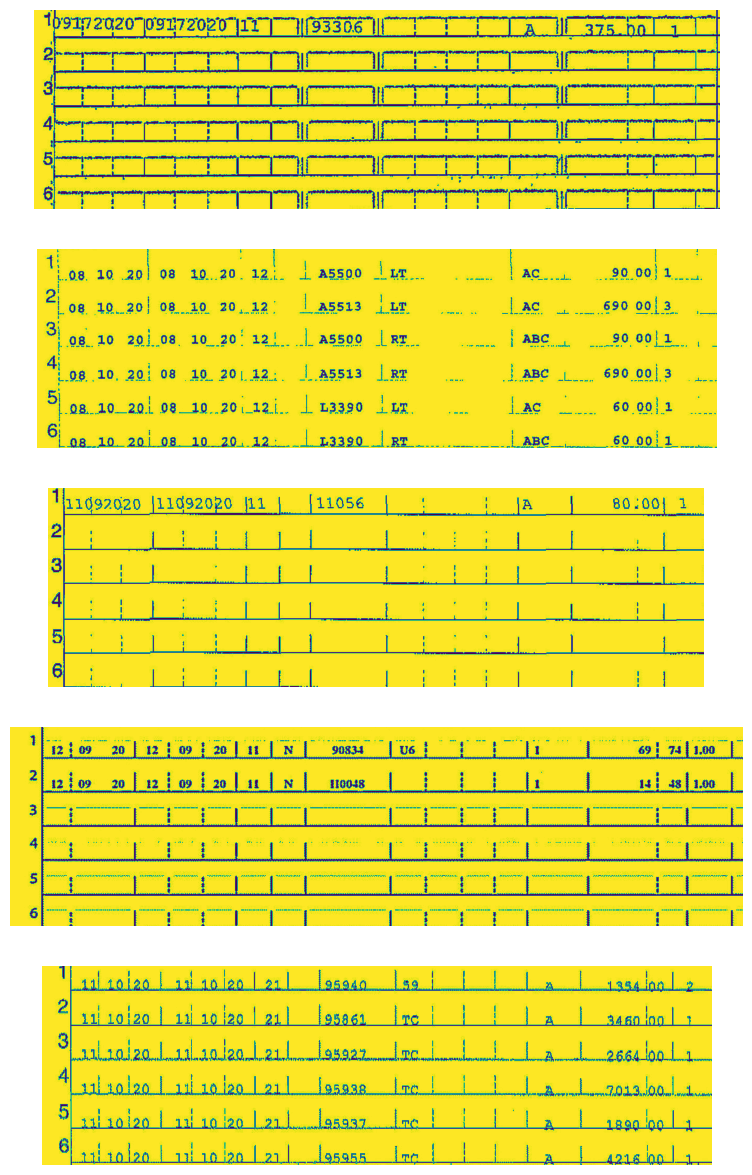

In [6]:
fig, axs = plt.subplots(5, 1, figsize=(25, 15))
axs = axs.flatten()
for i in range(5):
    axs[i].imshow(plt.imread(img_fns[i]))
    axs[i].axis('off')
    image_id = img_fns[i].split('/')[-1].rstrip('.jpg')
    
plt.show()

Method 1:pytesseract

In [7]:
import pytesseract
print(pytesseract.image_to_string(img_fns[1], lang='eng'))

Qu

98 10 20) 08 19.20.12; 1 assoo Jur.

j 2 |
08 10.20) 08.30 20,32° J AS55213 iBT oo jac 690 00

Ns

og.10 20/08 10.20/12! | assoo [Rr

>

98 10,20! 08 30 20,42: | assa3 | Rr

08..10_20: 0810 20:12]. | na390 jour.

R.

 

‘98 10 20: 08 10 20,32... | 13390 | Rr

 



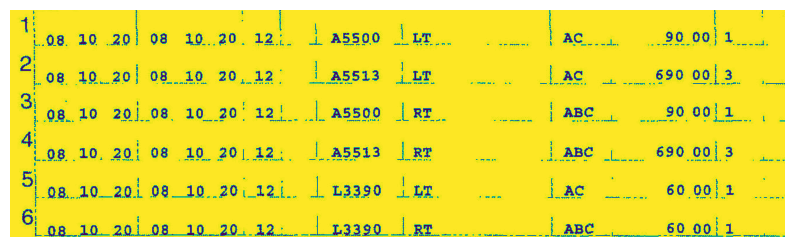

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(plt.imread(img_fns[1]))
ax.axis('off')
plt.show()

# Method 2: easyocr

In [9]:
import easyocr
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize']=8,16

In [10]:
reader = easyocr.Reader(['en'], gpu = True)

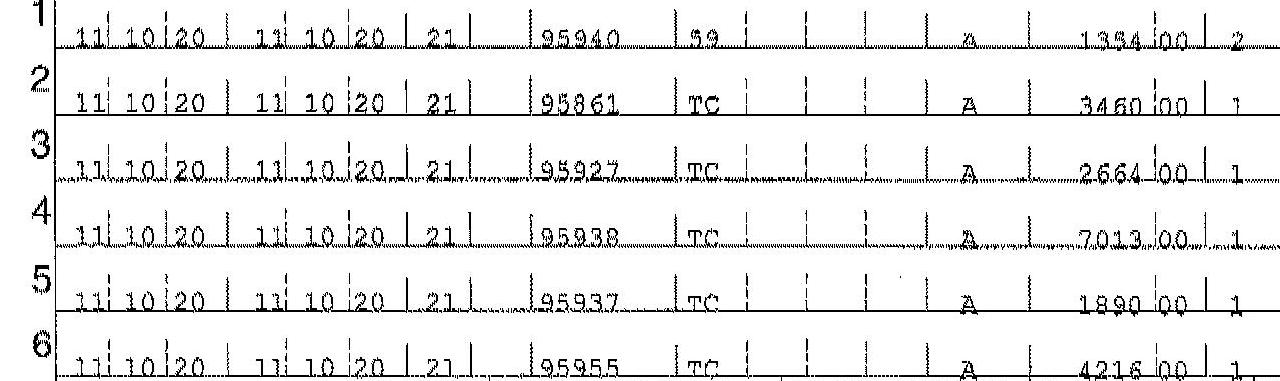

In [11]:
Image('../input/text-from-images/image_files/testimage1.jpeg')

In [12]:
output=reader.readtext('../input/text-from-images/image_files/testimage1.jpeg')

In [13]:
output

[([[58, 10], [342, 10], [342, 58], [58, 58]],
  '~llLilzoLuL1n',
  0.14073891541596087),
 ([[407, 19], [471, 19], [471, 55], [407, 55]], '_l', 0.5418375258505712),
 ([[540, 24], [608, 24], [608, 54], [540, 54]], '2524', 0.2288781702518463),
 ([[69, 75], [211, 75], [211, 119], [69, 119]], '11oz_', 0.19873470380452804),
 ([[248, 74], [392, 74], [392, 122], [248, 122]],
  '110l2o',
  0.2246422281085989),
 ([[421, 81], [465, 81], [465, 121], [421, 121]], '21', 0.9957960002852524),
 ([[535, 85], [625, 85], [625, 121], [535, 121]], '95861', 0.5618117539382219),
 ([[684, 88], [724, 88], [724, 118], [684, 118]], 'TC', 0.8684898404069246),
 ([[1096, 90], [1148, 90], [1148, 120], [1096, 120]],
  '4GL',
  0.05421342574879406),
 ([[1145, 79], [1197, 79], [1197, 123], [1145, 123]],
  'ono',
  0.03951703487310619),
 ([[47, 141], [472, 141], [472, 197], [47, 197]],
  'LalLnlzaLalLsalea_L21 L',
  0.04108631070590949),
 ([[478, 176], [524, 176], [524, 182], [478, 182]],
  "Fand'uEF",
  0.00256606956318

In [14]:
pd.DataFrame(output, columns=['bbox','text','conf'])

,bbox,text,conf
0,"[[58, 10], [342, 10], [342, 58], [58, 58]]",~llLilzoLuL1n,0.140739
1,"[[407, 19], [471, 19], [471, 55], [407, 55]]",_l,0.541838
2,"[[540, 24], [608, 24], [608, 54], [540, 54]]",2524,0.228878
3,"[[69, 75], [211, 75], [211, 119], [69, 119]]",11oz_,0.198735
4,"[[248, 74], [392, 74], [392, 122], [248, 122]]",110l2o,0.224642
5,"[[421, 81], [465, 81], [465, 121], [421, 121]]",21,0.995796
6,"[[535, 85], [625, 85], [625, 121], [535, 121]]",95861,0.561812
7,"[[684, 88], [724, 88], [724, 118], [684, 118]]",TC,0.868490
8,"[[1096, 90], [1148, 90], [1148, 120], [1096, 1...",4GL,0.054213
9,"[[1145, 79], [1197, 79], [1197, 123], [1145, 1...",ono,0.039517


# Method 3: keras_ocr

In [ ]:
from IPython.display import clear_output
!pip install keras-ocr --user
clear_output()

import keras_ocr

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

In [ ]:
results = pipeline.recognize([img_fns[11]])

In [ ]:
pd.DataFrame(results[0], columns=['text', 'bbox'])

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(plt.imread(img_fns[1]), results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

# Compare easyocr vs. keras_ocr

In [16]:
# easyocr
reader = easyocr.Reader(['en'], gpu = True)

dfs = []
for img in tqdm(img_fns[:5]):
    result = reader.readtext(img)
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['bbox','text','conf'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
easyocr_df = pd.concat(dfs)

  0%|          | 0/5 [00:00<?, ?it/s]

In [17]:
easyocr_df

,bbox,text,conf,img_id
0,"[[12, 0], [424, 0], [424, 50], [12, 50]]",189172020-109172020771T,0.413892,testimage2
1,"[[507, 13], [613, 13], [613, 51], [507, 51]]",33306,0.416385,testimage2
2,"[[1014, 24], [1078, 24], [1078, 54], [1014, 54]]",375,0.430898,testimage2
0,"[[19, 15], [35, 15], [35, 41], [19, 41]]",1,0.977207,testimage5
1,"[[58, 40], [100, 40], [100, 70], [58, 70]]",08.,0.984535,testimage5
...,...,...,...,...
25,"[[1170, 222], [1280, 222], [1280, 254], [1170,...","Oxwl,nvd,Mann",0.040142,testimage1
26,"[[156, 266], [394, 266], [394, 320], [156, 320]]",i2Lua1o 2o_,0.176934,testimage1
27,"[[421, 283], [463, 283], [463, 319], [421, 319]]",21,0.804821,testimage1
28,"[[68, 336], [462, 336], [462, 381], [68, 381]]",11k2aLula k2o Lza,0.032752,testimage1


In [18]:
print(easyocr_df)

                                                 bbox  \
0            [[12, 0], [424, 0], [424, 50], [12, 50]]   
1        [[507, 13], [613, 13], [613, 51], [507, 51]]   
2    [[1014, 24], [1078, 24], [1078, 54], [1014, 54]]   
0            [[19, 15], [35, 15], [35, 41], [19, 41]]   
1          [[58, 40], [100, 40], [100, 70], [58, 70]]   
..                                                ...   
25  [[1170, 222], [1280, 222], [1280, 254], [1170,...   
26   [[156, 266], [394, 266], [394, 320], [156, 320]]   
27   [[421, 283], [463, 283], [463, 319], [421, 319]]   
28     [[68, 336], [462, 336], [462, 381], [68, 381]]   
29   [[538, 352], [606, 352], [606, 380], [538, 380]]   

                       text      conf      img_id  
0   189172020-109172020771T  0.413892  testimage2  
1                     33306  0.416385  testimage2  
2                       375  0.430898  testimage2  
0                         1  0.977207  testimage5  
1                       08.  0.984535  testimage5  
.. 

In [ ]:
easyocr_df.to_json(r'input\text-from-images\shaw_laxmi_results.json')

In [23]:
import json
result = easyocr_df.to_json(orient="table")
parsed = json.loads(result)
json.dumps(parsed, indent=1)

'{\n "schema": {\n  "fields": [\n   {\n    "name": "index",\n    "type": "integer"\n   },\n   {\n    "name": "bbox",\n    "type": "string"\n   },\n   {\n    "name": "text",\n    "type": "string"\n   },\n   {\n    "name": "conf",\n    "type": "number"\n   },\n   {\n    "name": "img_id",\n    "type": "string"\n   }\n  ],\n  "pandas_version": "0.20.0"\n },\n "data": [\n  {\n   "index": 0,\n   "bbox": [\n    [\n     12,\n     0\n    ],\n    [\n     424,\n     0\n    ],\n    [\n     424,\n     50\n    ],\n    [\n     12,\n     50\n    ]\n   ],\n   "text": "189172020-109172020771T",\n   "conf": 0.4138918571,\n   "img_id": "testimage2"\n  },\n  {\n   "index": 1,\n   "bbox": [\n    [\n     507,\n     13\n    ],\n    [\n     613,\n     13\n    ],\n    [\n     613,\n     51\n    ],\n    [\n     507,\n     51\n    ]\n   ],\n   "text": "33306",\n   "conf": 0.4163854163,\n   "img_id": "testimage2"\n  },\n  {\n   "index": 2,\n   "bbox": [\n    [\n     1014,\n     24\n    ],\n    [\n     1078,\n     

In [ ]:
# keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

dfs = []
for img in tqdm(img_fns[:5]):
    results = pipeline.recognize([img])
    result = results[0]
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['text', 'bbox'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
kerasocr_df = pd.concat(dfs)

# Plot Results: easyocr vs keras_ocr

In [ ]:
def plot_compare(img_fn, easyocr_df, kerasocr_df):
    img_id = img_fn.split('/')[-1].split('.')[0]
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    easy_results = easyocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn), 
                                    easy_results, ax=axs[0])
    axs[0].set_title('easyocr results', fontsize=24)

    keras_results = kerasocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    keras_results = [(x[0], np.array(x[1])) for x in keras_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn), 
                                    keras_results, ax=axs[1])
    axs[1].set_title('keras_ocr results', fontsize=24)
    plt.show()

In [ ]:
# Loop over results
for img_fn in img_fns[:5]:
    plot_compare(img_fn, easyocr_df, kerasocr_df)